<a href="https://colab.research.google.com/github/MeiByeleth/AIMathBook/blob/master/signate_medical_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install signate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=1e3a7f08fd3f81591241490bf7f1911a9a9ee304c1350b6d3d6f524d5175da62
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [4]:
!pip install signate

from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth


auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'signate.json'", fields="files(id)").execute()
signate_api_key = results.get('files', [])

filename = "/root/.signate/signate.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=signate_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Download 100%.


In [5]:
! signate list

  competitionId  title                                                                             closing     prize        submitters
---------------  --------------------------------------------------------------------------------  ----------  ---------  ------------
              1  【練習問題】銀行の顧客ターゲティング                                              -                              6743
             24  【練習問題】お弁当の需要予測                                                      -                              8138
             27  【練習問題】Jリーグの観客動員数予測                                               -                              1944
            100  【練習問題】手書き文字認識                                                        -           Knowledge           300
            102  【練習問題】タイタニックの生存予測                                                -           Knowledge          2199
            103  【練習問題】音楽ラベリング                                                        -           Knowledge           154
            

In [6]:
!signate files --competition-id=751

  fileId  name               title                               size  updated_at
--------  -----------------  --------------------------------  ------  -------------------
    1994  train.csv          学習用データ                       68414  2021-04-22 11:18:05
    1993  test.csv           評価用データ                       16318  2021-04-22 11:18:05
    1996  sample_submit.csv  サンプルサブミッション用ファイル    2570  2021-04-22 11:33:08


In [7]:
!signate download --competition-id=751 --file-id=1994
!signate download --competition-id=751 --file-id=1993
!signate download --competition-id=751 --file-id=1996

train.csv


Download completed.
test.csv


Download completed.
sample_submit.csv


Download completed.


In [8]:
!ls

sample_data  sample_submit.csv	test.csv  train.csv


In [9]:
import pandas as pd

train_df=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
sample=pd.read_csv("sample_submit.csv")

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1600 non-null   int64  
 1   age       1600 non-null   int64  
 2   sex       1600 non-null   object 
 3   bmi       1600 non-null   float64
 4   children  1600 non-null   int64  
 5   smoker    1600 non-null   object 
 6   region    1600 non-null   object 
 7   charges   1600 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 100.1+ KB


In [11]:
sample.head()

,13,0
0,23,0
1,27,0
2,28,0
3,29,0
4,32,0


In [12]:
!pip install pandas-profiling
import pandas as pd
import pandas_profiling as pdp

pdp.ProfileReport(train_df)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 50.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=34eddb3d286c09420eddbed81edc4e7dfb0db896b7510e4dd7ddea2622f0a714
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attemp

<ipython-input-12-e802d1c44019>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pdp


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

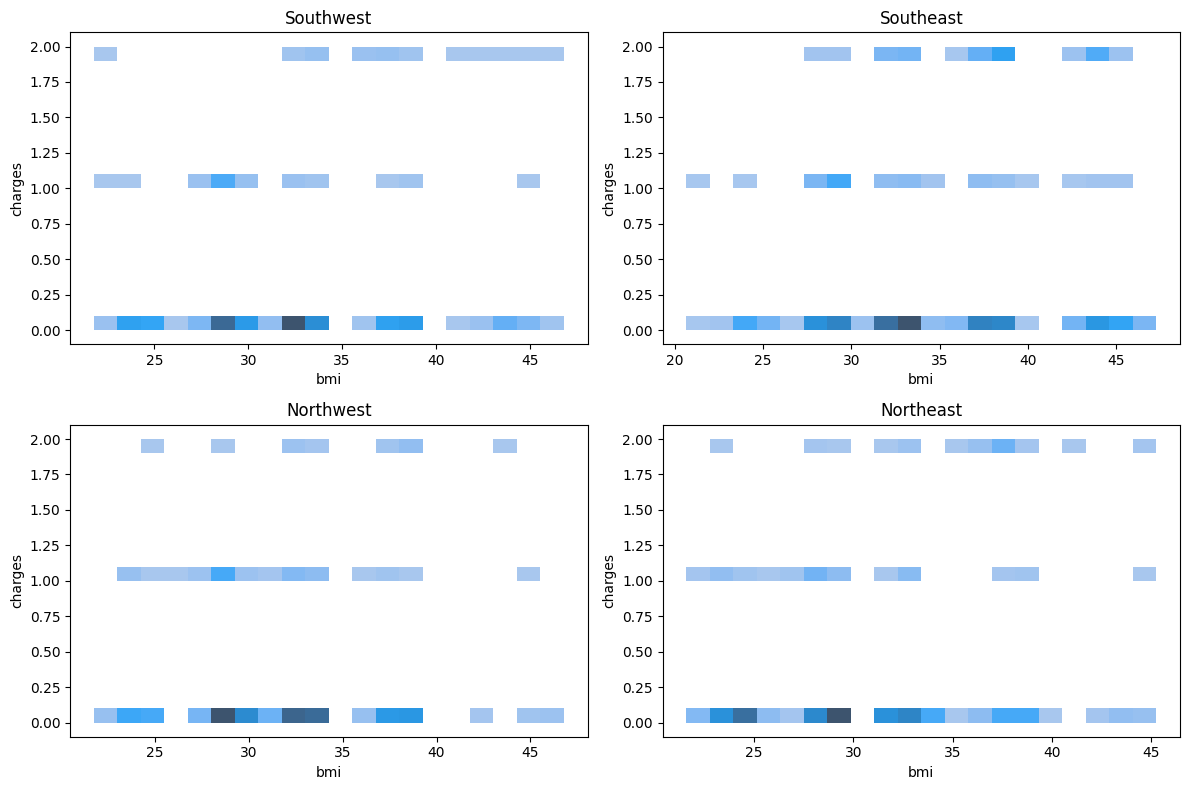

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 各地域ごとにデータを分割
southwest_data = train_df[train_df['region'] == 'southwest']
southeast_data = train_df[train_df['region'] == 'southeast']
northwest_data = train_df[train_df['region'] == 'northwest']
northeast_data = train_df[train_df['region'] == 'northeast']

# ヒストグラムを表示
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(data=southwest_data, x='bmi', y='charges', bins=20)
plt.title('Southwest')

plt.subplot(2, 2, 2)
sns.histplot(data=southeast_data, x='bmi', y='charges', bins=20)
plt.title('Southeast')

plt.subplot(2, 2, 3)
sns.histplot(data=northwest_data, x='bmi', y='charges', bins=20)
plt.title('Northwest')

plt.subplot(2, 2, 4)
sns.histplot(data=northeast_data, x='bmi', y='charges', bins=20)
plt.title('Northeast')

plt.tight_layout()
plt.show()


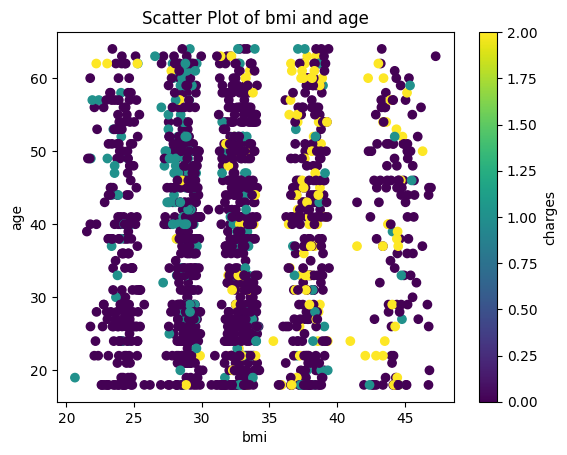

In [14]:
import matplotlib.pyplot as plt

plt.scatter(train_df["bmi"], train_df["age"], c=train_df["charges"])
plt.colorbar(label="charges")
plt.xlabel("bmi")
plt.ylabel("age")
plt.title("Scatter Plot of bmi and age")
plt.show()


In [ ]:
!pip install umap-learn
import umap
import matplotlib.pyplot as plt

# UMAPのインスタンスを作成
umap_model = umap.UMAP()

# データをUMAPで次元削減
umap_embedding = umap_model.fit_transform(train_df[["bmi", "age"]])

# 可視化
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=train_df["charges"])
plt.colorbar(label="charges")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("UMAP Visualization of bmi and age")
plt.show()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=f857c68a6c8c8c05ce2ae003f5fc0f18c6ef95e128ee06185457fcd31a63d1fa
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=75701abf8ee5659330533e954901f386af84397af2c3f122f89e02c26aea99b2
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# t-SNEを適用するデータ
data = train_df[['bmi', 'age']]

# t-SNEのインスタンスを作成し、次元削減を実行
tsne = TSNE(n_components=2, random_state=0)
embedded_data = tsne.fit_transform(data)

# 可視化
plt.scatter(embedded_data[:, 0], embedded_data[:, 1], c=train_df['charges'], cmap='viridis')
plt.colorbar(label='charges')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization')
plt.show()


In [ ]:
cross_table_region = pd.crosstab(train_df['region'], train_df['charges'])
print(cross_table_region)

In [ ]:
cross_table_child = pd.crosstab(train_df['children'], train_df['charges'])
print(cross_table_child)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='children', hue='charges', data=train_df)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='region', hue='charges', data=train_df)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

southeast_data = train_df[train_df['region'] == 'southeast']
age_data = southeast_data['age']

plt.hist(age_data, bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution in Southeast Region')
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# データの取得
southeast_data = train_df[train_df['region'] == 'southeast']
southwest_data = train_df[train_df['region'] == 'southwest']
northeast_data = train_df[train_df['region'] == 'northeast']
northwest_data = train_df[train_df['region'] == 'northwest']

# chargesのクラスごとの頻度を計算
southeast_charges = southeast_data['charges'].value_counts()
southwest_charges = southwest_data['charges'].value_counts()
northeast_charges = northeast_data['charges'].value_counts()
northwest_charges = northwest_data['charges'].value_counts()

# chargesのクラスを取得
charges_classes = sorted(train_df['charges'].unique())

# 積み上げヒストグラムを作成
plt.figure(figsize=(10, 6))
plt.hist([southeast_data[southeast_data['charges'] == c]['age'] for c in charges_classes], bins=10, stacked=True, label=charges_classes, edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Stacked Histogram of Charges by Age')
plt.legend(title='Charges Class')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

southwest_data = train_df[train_df['region'] == 'southwest']

# chargesのクラスごとのデータを取得
charge_0 = southwest_data[southwest_data['charges'] == 0]['age']
charge_1 = southwest_data[southwest_data['charges'] == 1]['age']
charge_2 = southwest_data[southwest_data['charges'] == 2]['age']

# 積み上げヒストグラムを作成
plt.figure(figsize=(10, 6))
plt.hist([charge_0, charge_1, charge_2], bins=10, stacked=True, label=['Charge 0', 'Charge 1', 'Charge 2'], edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Stacked Histogram of Charges by Age in Southwest Region')
plt.legend(title='Charges Class')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

southeast_data = train_df[train_df['region'] == 'southeast']

# chargesのクラスごとのデータを取得
charge_0 = southeast_data[southeast_data['charges'] == 0]['age']
charge_1 = southeast_data[southeast_data['charges'] == 1]['age']
charge_2 = southeast_data[southeast_data['charges'] == 2]['age']

# 積み上げヒストグラムを作成
plt.figure(figsize=(10, 6))
plt.hist([charge_0, charge_1, charge_2], bins=10, stacked=True, label=['Charge 0', 'Charge 1', 'Charge 2'], edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Stacked Histogram of Charges by Age in Southeast Region')
plt.legend(title='Charges Class')
plt.show()


In [ ]:
import seaborn as sns
sns.boxplot(x='region', y='age', hue= 'sex', data=train_df)
plt.show()

sns.scatterplot(x='age', y='region', hue='charges', data=train_df)
plt.show()

In [ ]:
cross_table_age = pd.crosstab(train_df['age'], train_df['charges'])
print(cross_table_age)
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(cross_table_age)
print("カイ二乗統計量:", chi2)
print("p値:", p)

In [ ]:
cross_table_region = pd.crosstab(train_df['sex'], train_df['charges'])
print(cross_table_region)

In [ ]:
sns.boxplot(x='region', y='age', data=train_df[train_df['charges'] == 1])
plt.show()

In [ ]:
sns.scatterplot(x='bmi', y='region', hue='age', style='sex', data=train_df[train_df['charges'] == 1])
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(cross_table_age)
print("カイ二乗統計量:", chi2)
print("p値:", p)

## 特徴量エンジニアリング

```python

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       249
           1       0.58      0.44      0.50        32
           2       0.87      0.85      0.86        39

    accuracy                           0.90       320
   macro avg       0.80      0.75      0.77       320
weighted avg       0.89      0.90      0.89       320
```
が最大値



In [ ]:
all_df = pd.get_dummies(train_df)
all_df=all_df.drop(columns=['id','smoker_no','sex_female','region_southwest'])
print(all_df)

In [ ]:
import pandas as pd

# BMIの区間を定義
bins = [0, 27, 31, 34, 40, 100]  # 区間の境界値

# 区間にラベルを設定
labels = [0, 1, 2, 3, 4]

# "bmi_category"という新しい特徴量を作成
all_df['bmi_category'] = pd.cut(all_df['bmi'], bins=bins).apply(lambda x: labels.index(x))

# 結果を確認
print(all_df[['bmi', 'bmi_category']].head(10))
all_df = all_df.drop(columns=['bmi'])

子供が2人の時だけフラグを立てたら精度下がった。


```python

# 子供が2人の時だけフラグを立てる
# all_df['children_2'] = np.where(all_df['children'] == 2, 1, 0)

#all_df=all_df.drop(columns=['children'])
--------------- Classification Report ---------------

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       249
           1       0.56      0.44      0.49        32
           2       0.86      0.82      0.84        39

    accuracy                           0.90       320
   macro avg       0.79      0.74      0.76       320
weighted avg       0.89      0.90      0.89       320
```

In [ ]:
print(all_df)

# 新しい列を作成
#all_df['age_for1'] = np.where(((all_df['age'] <= 27) | ((46 <= all_df['age']) & (all_df['age'] <= 50))) & (all_df['region_southeast'] == 1), 1, 0)
#all_df=all_df.drop(columns=['age'])

In [ ]:
#  bins = [18, 31, 45, 58,100]
#  labels = ['18-31', '32-45', '46-58', '58+']
#  all_df['age_group'] = pd.cut(train['age'], bins=bins, labels=labels)
#  all_df = pd.get_dummies(all_df)

In [ ]:
corrmat = all_df.corr()
plt.subplots(figsize=(9,9))
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True)

In [ ]:
#all_df['health_risk_estimate'] = all_df['bmi'] + all_df['smoker_yes']

In [ ]:
from sklearn.metrics import f1_score
import xgboost as xgb
import lightgbm as lgb

In [ ]:
# モデル作成
model_xgb = xgb.XGBClassifier()

model_lgb = lgb.LGBMClassifier()

all_df.info()

In [ ]:
!pip install optuna

In [ ]:
import optuna
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import  classification_report
import numpy as np

target = all_df['charges']
train = all_df.drop(columns=['charges'])


def objective(trial):

    # 今までと同様にクロスバリデーションでモデルを評価します
    cv = KFold(n_splits=3, random_state=0, shuffle=True)
    val_acc_list = []

    # ハイパーパラメータを定義
    xgb_clf = xgb.XGBClassifier(
        objective='multi:softmax', #目的：多値分類
        num_class=3, #分類クラス数
        metric='multiclass', #評価指標は多クラスのLog損失
        seed=0,
        eval_metric=['merror','mlogloss'],
        # optunaでパラメータ探索する区間を指定
        max_depth=trial.suggest_int('max_depth', 1, 20))


    # KFold で学習させる
    for i ,(trn_index, val_index) in enumerate(cv.split(train, target)):

        print(f'Fold : {i}')
        # データ全体(Xとy)を学習データと評価データに分割
        X_train ,X_val ,y_train ,y_val = train_test_split(
        train, target, test_size=0.2,random_state=0 )
        print(y_train.head(20))
        # LigthGBM用のデータセットを定義
        xgb_train = xgb.DMatrix(X_train, label=y_train)
        xgb_valid = xgb.DMatrix(X_val, label=y_val)

        xgb_clf.fit(
            X_train,
            y_train,
            verbose=0, # set to 1 to see xgb training round intermediate results
            eval_set=[(X_train, y_train), (X_val, y_val)])


        results = xgb_clf.evals_result()
        epochs = len(results['validation_0']['mlogloss'])
        x_axis = range(0, epochs)

        import matplotlib.pyplot as plt

        # xgboost 'mlogloss' plot
        fig, ax = plt.subplots(figsize=(9,5))
        ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
        ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
        ax.legend()
        plt.ylabel('mlogloss')
        plt.title('GridSearchCV XGBoost mlogloss')
        plt.show()

        # xgboost 'merror' plot
        fig, ax = plt.subplots(figsize=(9,5))
        ax.plot(x_axis, results['validation_0']['merror'], label='Train')
        ax.plot(x_axis, results['validation_1']['merror'], label='Test')
        ax.legend()
        plt.ylabel('merror')
        plt.title('GridSearchCV XGBoost merror')
        plt.show()

        ## ---------- Model Classification Report ----------
        ## get predictions and create model quality report


        y_pred = xgb_clf.predict(X_val)
        val_acc = f1_score(
        y_val, y_pred, average = "macro"
        )
        val_acc_list.append(val_acc)

        print('Weighted F1-score: {:.2f}'.format(f1_score(y_val, y_pred, average='macro')))

        print('\n--------------- Classification Report ---------------\n')
        print(classification_report(y_val, y_pred))
        print('---------------------- XGBoost ----------------------') # unnecessary fancy styling
        val_acc_list.append(val_acc)

    # 最適化の指標にする値を返り値に設定
    return np.mean(val_acc_list)

study = optuna.create_study(direction='maximize')

# 最適化を実行します。この時の探索の試行回数をn_trialsで指定
study.optimize(objective, n_trials=30)

# 最適なパラメータとその時の精度を表示
print("best_value", study.best_value)
print("best_params", study.best_params)

In [ ]:
# 今までと同様にクロスバリデーションでモデルを評価します
cv = KFold(n_splits=3, random_state=0, shuffle=True)
val_acc_list = []


target = all_df['charges']
train = all_df.drop(columns='charges')

# ハイパーパラメータを定義
xgb_clf = xgb.XGBClassifier(
    objective='multi:softmax', #目的：多値分類
    num_class=3, #分類クラス数
    metric='multiclass', #評価指標は多クラスのLog損失
    seed=0,
    eval_metric=['merror','mlogloss'],
    max_depth=7
)


# KFold で学習させる
for i ,(trn_index, val_index) in enumerate(cv.split(train, target)):

    print(f'Fold : {i}')
    # データ全体(Xとy)を学習データと評価データに分割
    X_train ,X_val ,y_train ,y_val = train_test_split(
    train, target, test_size=0.2,random_state=0 )
    print(y_train.head(20))
    # LigthGBM用のデータセットを定義
    xgb_train = xgb.DMatrix(X_train, label=y_train)
    xgb_valid = xgb.DMatrix(X_val, label=y_val)

    xgb_clf.fit(
        X_train,
        y_train,
        verbose=0, # set to 1 to see xgb training round intermediate results
        eval_set=[(X_train, y_train), (X_val, y_val)])


    results = xgb_clf.evals_result()
    epochs = len(results['validation_0']['mlogloss'])
    x_axis = range(0, epochs)

import matplotlib.pyplot as plt

# xgboost 'mlogloss' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
plt.ylabel('mlogloss')
plt.title('GridSearchCV XGBoost mlogloss')
plt.show()

# xgboost 'merror' plot
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('merror')
plt.title('GridSearchCV XGBoost merror')
plt.show()

y_pred = xgb_clf.predict(X_val)
val_acc = f1_score(
    y_val, y_pred, average = "macro"
    )
print('\n--------------- Classification Report ---------------\n')
print(classification_report(y_val, y_pred))

In [ ]:
xgb.plot_importance(xgb_clf)

In [ ]:
# 提出
all_df_test = pd.get_dummies(test)

all_df_test=all_df_test.drop(columns=['id','smoker_no','sex_female','region_southwest'])

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCAを適用するデータ
data = all_df_test[['bmi', 'age','smoker_yes']]
embedded_data = pca.transform(data)
all_df_test["bmi"]=embedded_data[:, 0]
all_df_test["age"]=embedded_data[:, 1]
all_df_test["smoker_yes"]=embedded_data[:, 2]


from sklearn.preprocessing import MinMaxScaler

# Min-Max Scalingを適用する数値変数の列を選択
columns_to_scale = ['children']

# Min-Max Scalerのインスタンスを作成
scaler = MinMaxScaler()

# データのスケーリング
all_df_test[columns_to_scale] = scaler.fit_transform(all_df_test[columns_to_scale])
print(all_df_test)

In [ ]:
result = xgb_clf.predict(all_df_test)
print(result)

In [ ]:
sample=pd.read_csv("sample_submit.csv")
sample.columns = ["13", "0"]  # 列名を設定する
sample["0"] = result[1:]  # resultの長さをsampleに合わせて代入する
sample.to_csv("output.csv", index=False)  # CSVファイルとして出力する
print(sample)

In [ ]:
#!signate submit --competition-id=751 /content/output.csv --note lightgbmだけ

In [ ]:
 # LigthGBM用のデータセットを定義

lgb_params = {
        'boosting_type': 'gbdt', #勾配ブースティング決定木
        'objective': 'multiclass', #目的：多値分類
        'num_class': 3, #分類クラス数
        'metric': 'multi_logloss', #評価指標は多クラスのLog損失
        "force_row_wise" : True,
        "seed" : 0,
        'learning_rate': 0.1,
        'min_data_in_leaf': 5,
        "max_depth": 2
        }

y_pred = model.predict(all_df_test)
print("y_pred is")
y_pred = np.argmax(y_pred, axis=1)
result = pd.concat([all_df_test, pd.DataFrame({'y_pred': y_pred})], axis=1)
print(result)


In [ ]:
import optuna
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import numpy as np

target = all_df['charges']
train = all_df.drop(columns='charges')

def objective(trial):

    # 今までと同様にクロスバリデーションでモデルを評価します
    cv = KFold(n_splits=3, random_state=0, shuffle=True)
    val_acc_list = []

    # ハイパーパラメータを定義
    lgb_params = {
        'boosting_type': 'gbdt', #勾配ブースティング決定木
        'objective': 'multiclass', #目的：多値分類
        'num_class': 3, #分類クラス数
        'metric': 'multiclass', #評価指標は多クラスのLog損失
        "force_row_wise" : True,
        "seed" : 0,
        'learning_rate': 0.1,
        'min_data_in_leaf': 5,

        # optunaでパラメータ探索する区間を指定
        "max_depth": trial.suggest_int('max_depth', 1, 20),
        }

    # KFold で学習させる
    for i ,(trn_index, val_index) in enumerate(cv.split(train, target)):

        print(f'Fold : {i}')
        # データ全体(Xとy)を学習データと評価データに分割
        X_train ,X_val ,y_train ,y_val = train_test_split(
        train, target, test_size=0.2,random_state=0 )
        print(y_train.head(20))
        # LigthGBM用のデータセットを定義
        lgb_train = lgb.Dataset(X_train, y_train)
        lgb_valid = lgb.Dataset(X_val, y_val)
        lgb_train = lgb.Dataset(X_train, y_train)
        lgb_valid = lgb.Dataset(X_val, y_val)

        model = lgb.train(
            params = lgb_params,
            train_set = lgb_train,
            valid_sets = [lgb_train, lgb_valid],
            verbose_eval = -1 ,
            early_stopping_rounds=10
           )


        y_pred_val = model.predict(X_val)
        # print(y_pred_val)
        y_pred_val = np.argmax(y_pred_val, axis=1)
        val_acc = f1_score(
        y_val, y_pred_val, average = "macro"
        )
        print(val_acc)
        val_acc_list.append(val_acc)

    # 最適化の指標にする値を返り値に設定
    return np.mean(val_acc_list)

# 最適化タスクを定義
# 引数のdirectionには最適化する指標を最大化したいのか、最小化したいのかを指定
study = optuna.create_study(direction="maximize")

# 最適化を実行します。この時の探索の試行回数をn_trialsで指定
study.optimize(objective, n_trials=30)

# 最適なパラメータとその時の精度を表示
print("best_value", study.best_value)
print("best_params", study.best_params)

In [ ]:
import optuna
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import numpy as np

target = all_df['charges']
train = all_df.drop(columns='charges')

def objective(trial):

    # 今までと同様にクロスバリデーションでモデルを評価します
    cv = KFold(n_splits=3, random_state=0, shuffle=True)
    val_acc_list = []

    # ハイパーパラメータを定義
    lgb_params = {
        'boosting_type': 'gbdt', #勾配ブースティング決定木
        'objective': 'multiclass', #目的：多値分類
        'num_class': 3, #分類クラス数
        'metric': 'multiclass', #評価指標は多クラスのLog損失
        "force_row_wise" : True,
        "seed" : 0,
        'learning_rate': 0.1,
        'min_data_in_leaf': 5,

        # optunaでパラメータ探索する区間を指定
        "max_depth": trial.suggest_int('max_depth', 1, 20),
        }

    # KFold で学習させる
    for i ,(trn_index, val_index) in enumerate(cv.split(train, target)):

        print(f'Fold : {i}')
        # データ全体(Xとy)を学習データと評価データに分割
        X_train ,X_val ,y_train ,y_val = train_test_split(
        train, target, test_size=0.2,random_state=0 )
        print(y_train.head(20))
        # LigthGBM用のデータセットを定義
        lgb_train = lgb.Dataset(X_train, y_train)
        lgb_valid = lgb.Dataset(X_val, y_val)
        lgb_train = lgb.Dataset(X_train, y_train)
        lgb_valid = lgb.Dataset(X_val, y_val)

        model = lgb.train(
            params = lgb_params,
            train_set = lgb_train,
            valid_sets = [lgb_train, lgb_valid],
            verbose_eval = -1 ,
            early_stopping_rounds=10
           )


        y_pred_val = model.predict(X_val)
        # print(y_pred_val)
        y_pred_val = np.argmax(y_pred_val, axis=1)
        val_acc = f1_score(
        y_val, y_pred_val, average = "macro"
        )
        print(val_acc)
        val_acc_list.append(val_acc)

    # 最適化の指標にする値を返り値に設定
    return np.mean(val_acc_list)

# 最適化タスクを定義
# 引数のdirectionには最適化する指標を最大化したいのか、最小化したいのかを指定
study = optuna.create_study(direction="maximize")

# 最適化を実行します。この時の探索の試行回数をn_trialsで指定
study.optimize(objective, n_trials=30)

# 最適なパラメータとその時の精度を表示
print("best_value", study.best_value)
print("best_params", study.best_params)